### Libraries

In [23]:
import pandas as pd 
import numpy as np
import seaborn as sns
import statistics
import statsmodels.api as sm
import matplotlib.pyplot as plt
import random
from scipy import stats
from scipy.stats import spearmanr
import scipy.stats

### Sleep Data

In [24]:
# Importing Sleep Data

sleep_data = pd.read_csv("sleep.csv")
print(sleep_data)

    Unnamed: 0  extra  group  ID
0            1    0.7      1   1
1            2   -1.6      1   2
2            3   -0.2      1   3
3            4   -1.2      1   4
4            5   -0.1      1   5
5            6    3.4      1   6
6            7    3.7      1   7
7            8    0.8      1   8
8            9    0.0      1   9
9           10    2.0      1  10
10          11    1.9      2   1
11          12    0.8      2   2
12          13    1.1      2   3
13          14    0.1      2   4
14          15   -0.1      2   5
15          16    4.4      2   6
16          17    5.5      2   7
17          18    1.6      2   8
18          19    4.6      2   9
19          20    3.4      2  10


In [25]:
sleep_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  20 non-null     int64  
 1   extra       20 non-null     float64
 2   group       20 non-null     int64  
 3   ID          20 non-null     int64  
dtypes: float64(1), int64(3)
memory usage: 768.0 bytes


In [26]:
# Converting dataframe into series.

sleep_2 = pd.DataFrame([[0.7, 1.9],
                        [-1.6, 0.8],
                        [-0.2, 1.1],
                        [-1.2, 0.1],
                        [-0.1, -0.1],
                        [3.4, 4.4],
                        [3.7, 5.5],
                        [0.8, 1.6],
                        [0.0, 4.6],
                        [2.0, 3.4]], 
                       columns=['Y','X'])
print(sleep_2)

     Y    X
0  0.7  1.9
1 -1.6  0.8
2 -0.2  1.1
3 -1.2  0.1
4 -0.1 -0.1
5  3.4  4.4
6  3.7  5.5
7  0.8  1.6
8  0.0  4.6
9  2.0  3.4


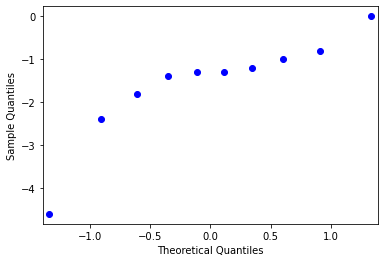

In [27]:
# Q-Q Plot to test assumptions regarding normality of data.

diff = sleep_2["Y"]-sleep_2["X"]
fig = sm.qqplot(diff, line='')
plt.show()

In [28]:
# Mean Difference

meandiff = statistics.mean(sleep_2["Y"]) - statistics.mean(sleep_2["X"])
print(meandiff)

-1.58


In [29]:
# t-test

stats.ttest_rel(sleep_2["Y"], sleep_2["X"])

Ttest_relResult(statistic=-4.062127683382037, pvalue=0.00283289019738427)

In [30]:
# Confidence Interval

alpha = 0.05
diff_samples = sleep_2["Y"] - sleep_2["X"]                      
n = len(sleep_2["Y"])                                        
diff_mean = np.mean(diff_samples)                       
diff_variance = np.var( diff_samples, ddof=1 )          
critical_val = stats.t.ppf(q = 1-alpha/2, df = n - 1)  
radius = critical_val*np.sqrt(diff_variance)/np.sqrt(n) 
(diff_mean - radius, diff_mean + radius)

(-2.459885763254729, -0.7001142367452712)

In [31]:
# Nonparametric Bootstrapping

np.random.seed(11504)
n = len(sleep_2["Y"])
sleep_index = list(np.arange(start=1, stop=n))
nsim = 1000
statistic = list(np.arange(nsim))
for i in range(nsim):
    sleep_nboot = np.random.choice(sleep_index, n, replace=True)
    y_boot = sleep_2["Y"][sleep_nboot]
    x_boot = sleep_2["X"][sleep_nboot]
    statistic[i] = np.mean(y_boot) - np.mean(x_boot)
    
print(statistic[i])

-2.3599999999999994


In [32]:
# Standard Error

sd_error = statistics.stdev(statistic)
print(sd_error)

0.38890037786546816


In [33]:
# 95% Confidence Interval

ci_sleep_nonpar = np.percentile(statistic, [2.5, 97.5])
ci_sleep_nonpar

array([-2.46, -0.95])

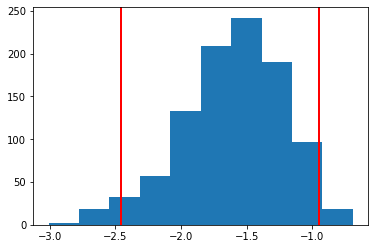

In [34]:
# Distribution

plt.hist(statistic, alpha = 1) 
plt.axvline(np.percentile(statistic, 2.5), color = 'red', linewidth=2) 
plt.axvline(np.percentile(statistic, 97.5), color = 'red', linewidth=2)

### Cars Data

In [35]:
# Importing Cars Data

mtcars_data = pd.read_csv("mtcars.csv")
print(mtcars_data)

             Unnamed: 0   mpg  cyl   disp   hp  drat     wt   qsec  vs  am  \
0             Mazda RX4  21.0    6  160.0  110  3.90  2.620  16.46   0   1   
1         Mazda RX4 Wag  21.0    6  160.0  110  3.90  2.875  17.02   0   1   
2            Datsun 710  22.8    4  108.0   93  3.85  2.320  18.61   1   1   
3        Hornet 4 Drive  21.4    6  258.0  110  3.08  3.215  19.44   1   0   
4     Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0   
5               Valiant  18.1    6  225.0  105  2.76  3.460  20.22   1   0   
6            Duster 360  14.3    8  360.0  245  3.21  3.570  15.84   0   0   
7             Merc 240D  24.4    4  146.7   62  3.69  3.190  20.00   1   0   
8              Merc 230  22.8    4  140.8   95  3.92  3.150  22.90   1   0   
9              Merc 280  19.2    6  167.6  123  3.92  3.440  18.30   1   0   
10            Merc 280C  17.8    6  167.6  123  3.92  3.440  18.90   1   0   
11           Merc 450SE  16.4    8  275.8  180  3.07  4.070  17.

In [36]:
mtcars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  32 non-null     object 
 1   mpg         32 non-null     float64
 2   cyl         32 non-null     int64  
 3   disp        32 non-null     float64
 4   hp          32 non-null     int64  
 5   drat        32 non-null     float64
 6   wt          32 non-null     float64
 7   qsec        32 non-null     float64
 8   vs          32 non-null     int64  
 9   am          32 non-null     int64  
 10  gear        32 non-null     int64  
 11  carb        32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [37]:
# Converting dataframe into series.

mpg = mtcars_data["mpg"]
hp = mtcars_data["hp"]

print(mpg)

0     21.0
1     21.0
2     22.8
3     21.4
4     18.7
5     18.1
6     14.3
7     24.4
8     22.8
9     19.2
10    17.8
11    16.4
12    17.3
13    15.2
14    10.4
15    10.4
16    14.7
17    32.4
18    30.4
19    33.9
20    21.5
21    15.5
22    15.2
23    13.3
24    19.2
25    27.3
26    26.0
27    30.4
28    15.8
29    19.7
30    15.0
31    21.4
Name: mpg, dtype: float64


In [38]:
# Spearman Correlation Coefficient

coef, p = spearmanr(mpg, hp)
print(coef)

-0.8946646457499626


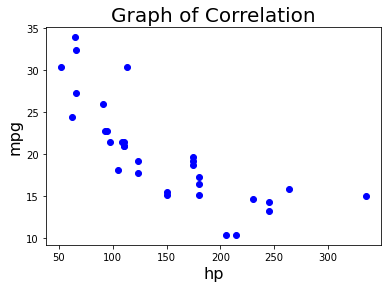

In [39]:
# Graph of Correlation

plt.scatter(hp, mpg, c='b',marker='o')
plt.xlabel('hp', fontsize = 16)
plt.ylabel('mpg', fontsize = 16)
plt.title('Graph of Correlation', fontsize=20)
plt.show()

In [40]:
# Nonparametric Bootstrapping

np.random.seed(11504)
m = len(hp)
cars_index = list(np.arange(start=1, stop=m))
msims = 1000
cars_cor = list(np.arange(msims))
for j in range(msims):
    cars_nboot = np.random.choice(cars_index, m, replace=True)
    hp_boot = hp[cars_nboot]
    mpg_boot = mpg[cars_nboot]
    cars_cor[j] = scipy.stats.spearmanr(hp_boot, mpg_boot)[0]
    
print(cars_cor[j])

-0.9349436139335843


In [41]:
# Standard Error

cars_error = statistics.stdev(cars_cor)
print(cars_error)

0.04436204635642321


In [42]:
# 95% Confidence Interval

ci_cars_nonpar = np.percentile(cars_cor, [2.5, 97.5])
ci_cars_nonpar

array([-0.94913532, -0.77815391])

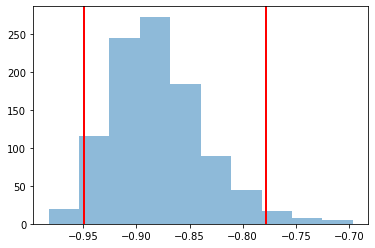

In [43]:
# Distribution

plt.hist(cars_cor, alpha = 0.5) 
plt.axvline(np.percentile(cars_cor, 2.5), color = 'red', linewidth=2) 
plt.axvline(np.percentile(cars_cor, 97.5), color = 'red', linewidth=2)